In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install unrar
!unrar x '/content/drive/MyDrive/Model 2.rar' > /dev/null 2>&1

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
data_dir_train = '/content/Model 2/train'
data_dir_val = '/content/Model 2/valid'

IMG_SIZE = 224
BATCH_SIZE = 32

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    shuffle=True,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_val,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE)

class_names = train_dataset.class_names

# Normalizing pixel values
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))


Found 41762 files belonging to 47 classes.
Found 10417 files belonging to 47 classes.


In [ ]:
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
EPOCHS = 10

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS
)


Epoch 1/10
1306/1306 [==============================] - 97s 66ms/step - loss: 0.4112 - accuracy: 0.8707 - val_loss: 0.2543 - val_accuracy: 0.9105
Epoch 2/10
1306/1306 [==============================] - 89s 68ms/step - loss: 0.2089 - accuracy: 0.9264 - val_loss: 0.2572 - val_accuracy: 0.9071
Epoch 3/10
1306/1306 [==============================] - 89s 68ms/step - loss: 0.1543 - accuracy: 0.9445 - val_loss: 0.2392 - val_accuracy: 0.9214
Epoch 4/10
1306/1306 [==============================] - 84s 64ms/step - loss: 0.1257 - accuracy: 0.9541 - val_loss: 0.2241 - val_accuracy: 0.9272
Epoch 5/10
1306/1306 [==============================] - 89s 68ms/step - loss: 0.1008 - accuracy: 0.9642 - val_loss: 0.2767 - val_accuracy: 0.9174
Epoch 6/10
1306/1306 [==============================] - 89s 68ms/step - loss: 0.0855 - accuracy: 0.9691 - val_loss: 0.2803 - val_accuracy: 0.9224
Epoch 7/10
1306/1306 [==============================] - 85s 65ms/step - loss: 0.0736 - accuracy: 0.9737 - val_loss: 0.3190 -

In [ ]:
loss, accuracy = model.evaluate(val_dataset)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

326/326 [==============================] - 18s 53ms/step - loss: 0.3205 - accuracy: 0.9342
Validation Loss: 0.3205
Validation Accuracy: 0.9342


In [ ]:
import matplotlib.pyplot as plt

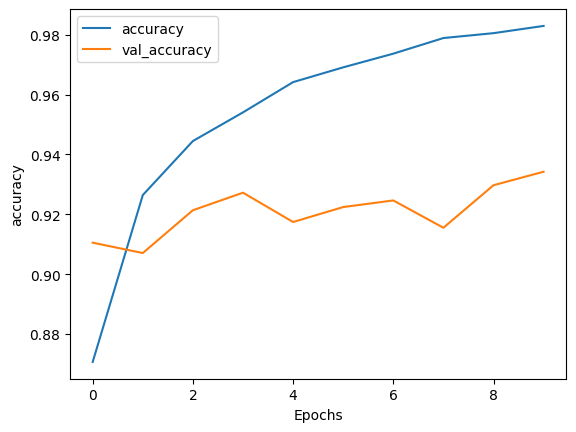

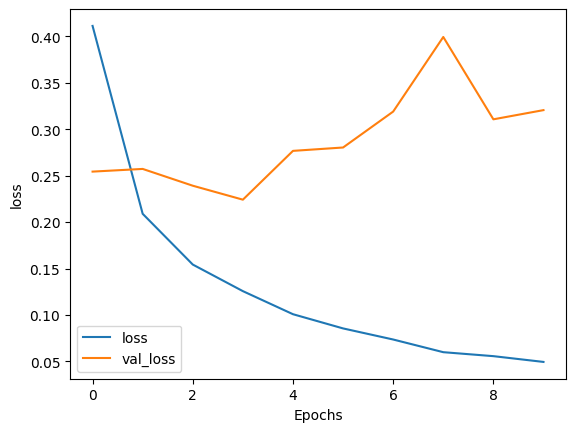

In [ ]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')